# Datasets Used :
# 1. Breast Cancer
# 2. Iris Dataset

In [1]:
!pip install sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [15 lines of output]
  The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
  rather than 'sklearn' for pip commands.
  
  Here is how to fix this error in the main use cases:
  - use 'pip install scikit-learn' rather than 'pip install sklearn'
  - replace 'sklearn' by 'scikit-learn' in your pip requirements files
    (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
  - if the 'sklearn' package is used by one of your dependencies,
    it would be great if you take some time to track which package uses
    'sklearn' instead of 'scikit-learn' and report it to their issue tracker
  - as a last resort, set the environment variable
    SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
  
  More information is available at
  https://github.com/scikit-learn/sklearn-pypi-package
  [end of output]
  
  note: This error originates from a subpr

In [2]:
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,ConfusionMatrixDisplay

In [3]:
svm = load_breast_cancer()
x = svm.data
y = svm.target

In [4]:
print(x.shape)

(569, 30)


In [5]:
print(y.shape)

(569,)


In [6]:
k_size = 0.25
r_seed = 100
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=k_size,random_state=r_seed)

In [7]:
print("Shape of X_train" ,X_train.shape)
print("Shape of y_train" ,y_train.shape)
print("Shape of X_train" ,X_test.shape)
print("Shape of y_train" ,y_test.shape)

Shape of X_train (426, 30)
Shape of y_train (426,)
Shape of X_train (143, 30)
Shape of y_train (143,)


# Decision Tree of Hold Out 

In [8]:
deci_tree =DecisionTreeClassifier(criterion ="entropy") # By default gini
deci_tree.fit(X_train,y_train)
prediction=deci_tree.predict(X_test)
accuracy_hold=accuracy_score(y_test,prediction)
a1= accuracy_hold*100
print( "Hold out ",a1)

Hold out  91.6083916083916


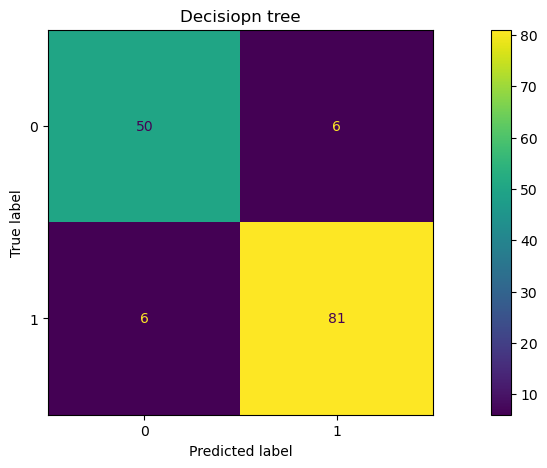

In [9]:
fig,(ax1)=plt.subplots()
fig.set_size_inches(15,5)
ax1.set_title("Decisiopn tree")
ConfusionMatrixDisplay.from_estimator(deci_tree,X_test,y_test,ax=ax1)

# KNN

In [10]:
#KNN (Nearst Neighbour)
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
print("Accuracy ")
a2 = knn.score(X_test,y_test)*100
print(a2)

Accuracy 
95.8041958041958


# Naive bayes

In [11]:
from sklearn.naive_bayes import GaussianNB
#fitting the model
nb=GaussianNB()
nb.fit(X_train,y_train)
prediction_nb =nb.predict(X_test)

print("Accuracy of Test Data")
nb_score=accuracy_score(y_test,prediction_nb)

a3 = nb_score*100
print("Naive Bayes Accuracy :",a3,"%")
print("Classification report on test data")
print(classification_report(y_test,prediction_nb))

Accuracy of Test Data
Naive Bayes Accuracy : 94.4055944055944 %
Classification report on test data
              precision    recall  f1-score   support

           0       0.94      0.91      0.93        56
           1       0.94      0.97      0.95        87

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143



In [12]:
import numpy as np
k=20
dta = []
for i in range(k):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3)
    deci_tree.fit(x_train, y_train)
    dta.append(deci_tree.score(x_test, y_test))
a4 = np.mean(dta)*100
print("Decision tree accuracy: " ,a4,"%")

Decision tree accuracy:  92.0760233918129 %


# Cross validation

In [13]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(deci_tree,svm.data,svm.target,cv=5)

In [14]:
mean_accuracy =scores.mean()
std_accuracy=scores.std()

In [15]:
a5 = mean_accuracy*100
print(a5)

93.67489520260828


In [16]:
print("Accurcay of Hold Out ",a1)
print("Accurcay of KNN ",a2)
print("Accurcay of Naive Bayes ",a3)
print("Accurcay of Cross Validation ",a4)

Accurcay of Hold Out  91.6083916083916
Accurcay of KNN  95.8041958041958
Accurcay of Naive Bayes  94.4055944055944
Accurcay of Cross Validation  92.0760233918129


### iris

In [17]:
iris = load_iris()
x=iris.data
y=iris.target

In [18]:
print(x.shape)

(150, 4)


In [19]:
print(y.shape)

(150,)


In [20]:
k_size=0.25
r_seed=100
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=k_size,random_state=r_seed)

In [21]:
print("Shape of X_train" ,X_train.shape)
print("Shape of y_train" ,y_train.shape)
print("Shape of X_train" ,X_test.shape)
print("Shape of y_train" ,y_test.shape)

Shape of X_train (112, 4)
Shape of y_train (112,)
Shape of X_train (38, 4)
Shape of y_train (38,)


## Decision Tree of Hold Out 

In [22]:
deci_tree =DecisionTreeClassifier(criterion ="entropy") # By default gini
deci_tree.fit(X_train,y_train)
prediction=deci_tree.predict(X_test)
accuracy_hold=accuracy_score(y_test,prediction)
a1= accuracy_hold*100
print( "Hold out ",a1)

Hold out  94.73684210526315


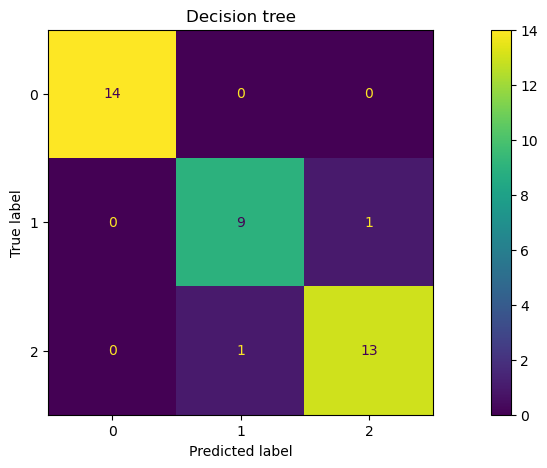

In [23]:
fig,(ax1)=plt.subplots()
fig.set_size_inches(15,5)
ax1.set_title("Decision tree")
ConfusionMatrixDisplay.from_estimator(deci_tree,X_test,y_test,ax=ax1)

## KNN

In [24]:
#KNN (Nearst Neighbour)
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
print("Accuracy ")
a2 = knn.score(X_test,y_test)*100
print(a2)

Accuracy 
97.36842105263158


In [25]:
from sklearn.naive_bayes import GaussianNB
#fitting the model
nb=GaussianNB()
nb.fit(X_train,y_train)
prediction_nb =nb.predict(X_test)

print("Accuracy of Test Data")
nb_score=accuracy_score(y_test,prediction_nb)

a3 = nb_score*100
print("Naive Bayes Accuracy :",a3,"%")
print("Classification report on test data")
print(classification_report(y_test,prediction_nb))

Accuracy of Test Data
Naive Bayes Accuracy : 94.73684210526315 %
Classification report on test data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.90      0.90      0.90        10
           2       0.93      0.93      0.93        14

    accuracy                           0.95        38
   macro avg       0.94      0.94      0.94        38
weighted avg       0.95      0.95      0.95        38



In [26]:
import numpy as np
k=20
dta = []
for i in range(k):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3)
    deci_tree.fit(x_train, y_train)
    dta.append(deci_tree.score(x_test, y_test))
a4 = np.mean(dta)*100
print("Decision tree accuracy: " ,a4,"%")

Decision tree accuracy:  94.88888888888889 %


In [27]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(deci_tree,iris.data,iris.target,cv=5)

In [28]:
mean_accuracy =scores.mean()
std_accuracy=scores.std()

In [29]:
a5 = mean_accuracy*100
print(a5)

96.00000000000001


In [30]:
print("Accurcay of Hold Out ",a1)
print("Accurcay of KNN ",a2)
print("Accurcay of Naive Bayes ",a3)
print("Accurcay of Cross Validation ",a4)

Accurcay of Hold Out  94.73684210526315
Accurcay of KNN  97.36842105263158
Accurcay of Naive Bayes  94.73684210526315
Accurcay of Cross Validation  94.88888888888889
